In [ ]:
# REMEBER TO USE CORRECT TTS_INFERENCE.PY

In [ ]:
pip install git+https://github.com/billybraith17/billiespnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/billybraith17/billiespnet to /tmp/pip-req-build-2t5712mw
  Running command git clone -q https://github.com/billybraith17/billiespnet /tmp/pip-req-build-2t5712mw
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 86 kB 3.3 MB/s 
     |████████████████████████████████| 1.3 MB 29.6 MB/s 
     |████████████████████████████████| 73 kB 2.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 212 kB 48.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 59.7 MB/s 
     |████████████████████████████████| 3.1 MB 46.9 MB/s 
     |████████████████████████████████| 235 kB 55.1 MB

In [ ]:
pip install torch espnet espnet_model_zoo parallel_wavegan==0.5.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.4 MB/s 
     |████████████████████████████████| 125 kB 27.3 MB/s 
     |████████████████████████████████| 120 kB 43.3 MB/s 
  Created wheel for parallel-wavegan: filename=parallel_wavegan-0.5.4-py3-none-any.whl size=71010 sha256=3e520dd9ee5c1202e3ff7fcb150f7b157bf1daefbc457583ff04b247a3e35251
  Stored in directory: /root/.cache/pip/wheels/5e/76/4d/8d938995675ca8cc9352214c9f23c57a505fe3bcd46ce3b138
Successfully built parallel-wavegan


In [ ]:
# import soundfile as sf
# wav = text2speech("Okay, here we go. Focus. Speed. I am speed. One winner, forty-two losers. I eat losers for breakfast. Breakfast? Maybe I should have had breakfast? Brekkie could be good for me. No, no, no, focus. Speed. Faster than fast, quicker than quick. I am Lightning")["wav"]
# sf.write("out.wav", wav.numpy(), text2speech.fs, "PCM_16")

# from IPython.display import display, Audio
# display(Audio(wav.view(-1).cpu().numpy(), rate=text2speech.fs))

In [ ]:
%%bash
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit
pip install ninja 2>> install.log
git clone https://github.com/SIDN-IAP/global-model-repr.git tutorial_code 2>> install.log
# git clone https://github.com/billybraith17/global-model-repr.git tutorial_code 2>> install.log

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
try: # set up path
    import google.colab, sys, torch
    sys.path.append('/content/tutorial_code')
    if not torch.cuda.is_available():
        print("Change runtime type to include a GPU.")
except:
    pass

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Running pytorch', torch.__version__, 'using', device.type)

Running pytorch 1.12.1+cu113 using cuda


In [ ]:
import torchvision
import torch.hub

# using the global-model-repr package
from netdissect import nethook, proggan

In [ ]:
# def from_pretrained2(
#     model_tag: Optional[str] = None,
#     vocoder_tag: Optional[str] = None,
#     **kwargs: Optional[Any],
# ):
"""Build Text2Speech instance from the pretrained model.
Args:
    model_tag (Optional[str]): Model tag of the pretrained models.
        Currently, the tags of espnet_model_zoo are supported.
    vocoder_tag (Optional[str]): Vocoder tag of the pretrained vocoders.
        Currently, the tags of parallel_wavegan are supported, which should
        start with the prefix "parallel_wavegan/".
Returns:
    Text2Speech: Text2Speech instance.
"""

from espnet2.bin.tts_inference import Text2Speech
from espnet2.bin.tts_inference import Text2Speech2

model_tag = 'kan-bayashi/vctk_xvector_conformer_fastspeech2' #@param ["kan-bayashi/vctk_gst_tacotron2", "kan-bayashi/vctk_gst_transformer", "kan-bayashi/vctk_xvector_tacotron2", "kan-bayashi/vctk_xvector_transformer", "kan-bayashi/vctk_xvector_conformer_fastspeech2", "kan-bayashi/vctk_gst+xvector_tacotron2", "kan-bayashi/vctk_gst+xvector_transformer", "kan-bayashi/vctk_gst+xvector_conformer_fastspeech2", "kan-bayashi/vctk_multi_spk_vits", "kan-bayashi/vctk_full_band_multi_spk_vits", "kan-bayashi/libritts_xvector_transformer", "kan-bayashi/libritts_xvector_conformer_fastspeech2", "kan-bayashi/libritts_gst+xvector_transformer", "kan-bayashi/libritts_gst+xvector_conformer_fastspeech2", "kan-bayashi/libritts_xvector_vits"] {type:"string"}
vocoder_tag = "parallel_wavegan/vctk_hifigan.v1"  #@param ["none", "parallel_wavegan/vctk_parallel_wavegan.v1.long", "parallel_wavegan/vctk_multi_band_melgan.v2", "parallel_wavegan/vctk_style_melgan.v1", "parallel_wavegan/vctk_hifigan.v1", "parallel_wavegan/libritts_parallel_wavegan.v1.long", "parallel_wavegan/libritts_multi_band_melgan.v2", "parallel_wavegan/libritts_hifigan.v1", "parallel_wavegan/libritts_style_melgan.v1"] {type:"string"}
kwargs = {
    # Only for Tacotron 2 & Transformer
    "threshold" : 0.5,
    # Only for Tacotron 2
    "minlenratio" : 0.0,
    "maxlenratio" : 10.0,
    "use_att_constraint" : False,
    "backward_window" : 1,
    "forward_window" : 3,
    # Only for FastSpeech & FastSpeech2 & VITS
    "speed_control_alpha" : 1.0,
    # Only for VITS
    "noise_scale" : 0.333,
    "noise_scale_dur" : 0.333,
}

# print(kwargs["noise_scale"])
# model_tag: Optional[str] = None
# vocoder_tag: Optional[str] = None
# **kwargs: Optional[Any]


if model_tag is not None:
    try:
        from espnet_model_zoo.downloader import ModelDownloader

    except ImportError:
        logging.error(
            "`espnet_model_zoo` is not installed. "
            "Please install via `pip install -U espnet_model_zoo`."
        )
        raise
    d = ModelDownloader()
    kwargs.update(**d.download_and_unpack(model_tag))

if vocoder_tag is not None:
    if vocoder_tag.startswith("parallel_wavegan/"):
        try:
            from parallel_wavegan.utils import download_pretrained_model

        except ImportError:
            logging.error(
                "`parallel_wavegan` is not installed. "
                "Please install via `pip install -U parallel_wavegan`."
            )
            raise

        from parallel_wavegan import __version__
        from packaging.version import parse as V
        from pathlib import Path

        # NOTE(kan-bayashi): Filelock download is supported from 0.5.2
        assert V(__version__) > V("0.5.1"), (
            "Please install the latest parallel_wavegan "
            "via `pip install -U parallel_wavegan`."
        )
        vocoder_tag = vocoder_tag.replace("parallel_wavegan/", "")
        vocoder_file = download_pretrained_model(vocoder_tag)
        vocoder_config = Path(vocoder_file).parent / "config.yml"
        kwargs.update(vocoder_config=vocoder_config, vocoder_file=vocoder_file)

    else:
        raise ValueError(f"{vocoder_tag} is unsupported format.")

# __init__
text2speech = Text2Speech(**kwargs)
text2speech2 = Text2Speech2(**kwargs)

In [ ]:
# Wrap the vocoder
from netdissect import nethook
# layer = 'vocoder.blocks.9.convs2.1.1'    #@param ["vocoder.last_conv_layers.0", "vocoder.last_conv_layers.1", "vocoder.last_conv_layers.2", "vocoder.last_conv_layers.3", "vocoder.conv_layers.6.conv", "vocoder.conv_layers.6.conv1x1_aux", "vocoder.conv_layers.6.conv1x1_out", "vocoder.conv_layers.6.conv1x1_skip", "vocoder.first_conv", "vocoder.upsample_net.conv_in", "vocoder.upsample_net.upsample.up_layers.6", "vocoder.upsample_net.upsample.up_layers.7", "vocoder.melgan.0", "vocoder.melgan.19.stack.4", "vocoder.melgan.23", "vocoder.pqmf.pad_fn", "vocoder.blocks.7.upsample", "vocoder.output_conv.1", "vocoder.blocks.11.convs2.0.1", "vocoder.output_conv.2", "vocoder.blocks.0.convs1.1.1", "vocoder.blocks.1.convs1.1.1", "vocoder.blocks.4.convs1.1.1", "vocoder.blocks.7.convs1.1.1", "vocoder.blocks.7.convs1.2.1", "vocoder.blocks.8.convs1.2.1", "vocoder.blocks.9.convs1.1.1", "vocoder.blocks.9.convs2.1.1",  "vocoder.blocks.10.convs1.1.1",  "vocoder.blocks.10.convs2.1.1", "vocoder.blocks.11.convs2.1.1", "vocoder.blocks.0.convs1.1.0", "vocoder.blocks.1.convs1.2.0", "vocoder.blocks.4.convs1.1.0", "vocoder.blocks.7.convs1.1.0", "vocoder.blocks.7.convs1.2.0", "vocoder.blocks.7.convs2.0.0", "vocoder.blocks.8.convs1.2.0", "vocoder.blocks.9.convs1.1.0", "vocoder.blocks.9.convs2.1.0",  "vocoder.blocks.10.convs1.1.0",  "vocoder.blocks.10.convs2.1.0", "vocoder.blocks.11.convs2.1.0"] {type:"string"}


# Don't re-wrap it, if it's already wrapped (e.g., if you press enter twice)
if not isinstance(text2speech.vocoder, nethook.InstrumentedModel):
    text2speech.vocoder = nethook.InstrumentedModel(text2speech.vocoder)
    text2speech2.vocoder = nethook.InstrumentedModel(text2speech2.vocoder)

HiFiGAN_layers = ['vocoder.upsamples.0.0', 'vocoder.upsamples.1.0', 'vocoder.upsamples.2.0', 'vocoder.upsamples.3.0', 'vocoder.blocks.0.convs1.0.0', 'vocoder.blocks.0.convs1.1.0', 'vocoder.blocks.0.convs1.2.0', 'vocoder.blocks.0.convs2.0.0', 'vocoder.blocks.0.convs2.1.0', 'vocoder.blocks.0.convs2.2.0', 'vocoder.blocks.1.convs1.0.0', 'vocoder.blocks.1.convs1.1.0', 'vocoder.blocks.1.convs1.2.0', 'vocoder.blocks.1.convs2.0.0', 'vocoder.blocks.1.convs2.1.0', 'vocoder.blocks.1.convs2.2.0', 'vocoder.blocks.2.convs1.0.0', 'vocoder.blocks.2.convs1.1.0', 'vocoder.blocks.2.convs1.2.0', 'vocoder.blocks.2.convs2.0.0', 'vocoder.blocks.2.convs2.1.0', 'vocoder.blocks.2.convs2.2.0', 'vocoder.blocks.3.convs1.0.0', 'vocoder.blocks.3.convs1.1.0', 'vocoder.blocks.3.convs1.2.0', 'vocoder.blocks.3.convs2.0.0', 'vocoder.blocks.3.convs2.1.0', 'vocoder.blocks.3.convs2.2.0', 'vocoder.blocks.4.convs1.0.0', 'vocoder.blocks.4.convs1.1.0', 'vocoder.blocks.4.convs1.2.0', 'vocoder.blocks.4.convs2.0.0', 'vocoder.blocks.4.convs2.1.0', 'vocoder.blocks.4.convs2.2.0', 'vocoder.blocks.5.convs1.0.0', 'vocoder.blocks.5.convs1.1.0', 'vocoder.blocks.5.convs1.2.0', 'vocoder.blocks.5.convs2.0.0', 'vocoder.blocks.5.convs2.1.0', 'vocoder.blocks.5.convs2.2.0', 'vocoder.blocks.6.convs1.0.0', 'vocoder.blocks.6.convs1.1.0', 'vocoder.blocks.6.convs1.2.0', 'vocoder.blocks.6.convs2.0.0', 'vocoder.blocks.6.convs2.1.0', 'vocoder.blocks.6.convs2.2.0', 'vocoder.blocks.7.convs1.0.0', 'vocoder.blocks.7.convs1.1.0', 'vocoder.blocks.7.convs1.2.0', 'vocoder.blocks.7.convs2.0.0', 'vocoder.blocks.7.convs2.1.0', 'vocoder.blocks.7.convs2.2.0', 'vocoder.blocks.8.convs1.0.0', 'vocoder.blocks.8.convs1.1.0', 'vocoder.blocks.8.convs1.2.0', 'vocoder.blocks.8.convs2.0.0', 'vocoder.blocks.8.convs2.1.0', 'vocoder.blocks.8.convs2.2.0', 'vocoder.blocks.9.convs1.0.0', 'vocoder.blocks.9.convs1.1.0', 'vocoder.blocks.9.convs1.2.0', 'vocoder.blocks.9.convs2.0.0', 'vocoder.blocks.9.convs2.1.0', 'vocoder.blocks.9.convs2.2.0', 'vocoder.blocks.10.convs1.0.0', 'vocoder.blocks.10.convs1.1.0', 'vocoder.blocks.10.convs1.2.0', 'vocoder.blocks.10.convs2.0.0', 'vocoder.blocks.10.convs2.1.0', 'vocoder.blocks.10.convs2.2.0', 'vocoder.blocks.11.convs1.0.0', 'vocoder.blocks.11.convs1.1.0', 'vocoder.blocks.11.convs1.2.0', 'vocoder.blocks.11.convs2.0.0', 'vocoder.blocks.11.convs2.1.0', 'vocoder.blocks.11.convs2.2.0', 'vocoder.output_conv.0', 'vocoder.output_conv.2']

for layer in HiFiGAN_layers:
  text2speech.vocoder.retain_layer(layer)
  text2speech2.vocoder.retain_layer(layer)

In [ ]:
text2speech.vocoder

# text2speech.vocoder.retain_layer('vocoder')

In [ ]:
import glob
import os
import numpy as np
import kaldiio

# Get model directory path
from espnet_model_zoo.downloader import ModelDownloader
d = ModelDownloader()
model_dir = os.path.dirname(d.download_and_unpack(model_tag)["train_config"])

# X-vector selection
# We only need the x-vector part at that's what this model uses. The ones with
spembs = None
if text2speech.use_spembs:
  xvector_ark = [p for p in glob.glob(f"{model_dir}/../../dump/**/spk_xvector.ark", recursive=True) if "tr" in p][0]
  xvectors = {k: v for k, v in kaldiio.load_ark(xvector_ark)}
  spks = list(xvectors.keys())

In [ ]:
# # edit the activations for testing
# my_units = []
# for x in range(30000):
#   my_units.append(x)

# def zero_out_units(data, model):
#     data[:, :, my_units] = 1.0
#     return data

# text2speech.vocoder.edit_layer(layer, rule=zero_out_units)

In [ ]:
southern_units = {0, 3, 4, 6, 7, 14, 30, 31, 41}
s_african_units = {82, 86, 93, 99}
indian = {21, 24, 107}
scottish = {9, 11, 15, 19, 20, 22, 25, 28, 33, 35, 36, 37, 38, 44, 45, 48, 54, 57, 58}
irish = {18, 39, 56, 61, 65, 67, 81, 95, 105}
dublin = {18, 61, 65, 95}
n_irish = {12, 34, 62, 63, 73, 100}
belfast = {12, 34, 62, 63, 73}
cali = {64, 68, 69, 85}
yorkshire = {40, 43, 60}
NE = {42, 50, 55, 59}
canada = {71, 72, 76, 80, 83, 84, 97, 104}

female = {0, 3,4,5,6, 8, 9, 10, 12, 13, 14, 17, 21, 22, 23, 26, 30, 34, 35, 37, 38, 39, 40, 41, 42, 49, 50, 53, 55, 56, 61, 63, 64, 65, 66, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 81,82, 84, 85, 86, 88, 89, 90, 92,93,94,95,96,97, 100, 102,103}
male = {1, 2, 7, 11, 15, 16, 18, 19, 20, 24, 25, 27, 28, 29, 31, 32, 33, 36, 43, 44, 45, 46, 47, 48, 51, 52, 54, 57, 58, 59, 60, 62, 67, 71, 73, 79, 83, 87, 91, 98, 99, 101, 104, 105, 106, 107}
edited = {7,8,9, 17,18,19, 27,28,29, 37,38,39, 47,48,49, 57,58,59, 67,68,69, 77,78,79, 87,88,89, 97,98,99, 107}

In [ ]:
# Calculating IoU for all layers
# MAKE SURE YOU CHANGE THE FILE NAME FIRST

# the ultimate loop
import pandas as pd
from netdissect import tally

# HERE
# x = "Please call Stella. Ask her to bring these things with her."
x = "Please call Stella. Ask her too."

# defining speaker indices
from torch.utils.data import TensorDataset
zds = torch.linspace(0, 107, 108)

# dictionary to store the results
data = {}

# HERE
# property we want to calculate the IoU for
chosen_property = edited

# loop over each layer in the network
for layer in HiFiGAN_layers:
  # To collect stats, define a function that returns 2d [samples, units]
  def compute_samples(index):
      # print(index)
      spk = spks[int(index[0])]
      spembs = xvectors[spk]
      wav = text2speech(x, spembs=spembs)["wav"]
      acts = text2speech.vocoder.retained_layer(layer)
      acts = torch.flatten(acts, start_dim=1)
      acts_stack = acts
      # print(acts.shape)
      # print(acts)
      # acts_stack = acts[0]

      for i in index[1:7]:
        spk = spks[int(i)]
        spembs = xvectors[spk]
        wav = text2speech(x, spembs=spembs)["wav"]
        # acts = model.retained_layer('layer4') # get the activations, and flatten
        acts = text2speech.vocoder.retained_layer(layer)
        # print(acts[0].shape)
        # print(acts)
        acts = torch.flatten(acts, start_dim=1)

        acts_stack = torch.cat((acts_stack, acts), 0)
        # print(acts_stack.shape)

      for i in index[7:]:
        spk = spks[int(i)]
        spembs = xvectors[spk]
        wav = text2speech2(x, spembs=spembs)["wav"]
        # acts = model.retained_layer('layer4') # get the activations, and flatten
        acts = text2speech2.vocoder.retained_layer(layer)
        # print(acts[0].shape)
        # print(acts)
        acts = torch.flatten(acts, start_dim=1)

        acts_stack = torch.cat((acts_stack, acts), 0)
        # print(acts_stack.shape)

      return acts_stack

# use topk to collect the speaker indices which cause the units to activate most
  topk = tally.tally_topk(compute_samples, zds)

  #calculate IoUs for this layer
  IoU_list = []
  result = topk.result()[1]
  result = result.tolist()
  # len(result)

# HERE
  for i in range(0, topk.result()[1].shape[0]):
    # which quantile we want for the threshold
    top = result[i][0:5]
    top = set(top)
    num = top.intersection(chosen_property)
    den = top.union(chosen_property)
    IoU_list.append(len(num) / len(den))

# calculating the number of property-specifc ndes in each layer
  # temp = 0
  # for i in IoU_list:
  #   if i>0.16:
  #     temp = temp+1

  # print(layer, '\n', temp, '\n')
# select the 20 largest IoUs in the layer and find their indices
  IoU_list = torch.tensor(IoU_list)
  top_IoU = torch.topk(IoU_list, 20)
  print(layer, '\n', top_IoU, '\n')
  data[layer] = [IoU_list, top_IoU[0], top_IoU[1]]

# HERE
# write dictionary to pandas dataframe
  frame = pd.DataFrame(data, index = ['All IoUs', 'Top IoUs', 'Indices of top IoUs'])
  frame.to_csv('easy_100_5.csv')


vocoder.upsamples.0.0 
 1594 



vocoder.upsamples.1.0 
 8052 



vocoder.upsamples.2.0 
 35926 



vocoder.upsamples.3.0 
 65891 



vocoder.blocks.0.convs1.0.0 
 3716 



vocoder.blocks.0.convs1.1.0 
 5042 



vocoder.blocks.0.convs1.2.0 
 7086 



vocoder.blocks.0.convs2.0.0 
 4048 



vocoder.blocks.0.convs2.1.0 
 8725 



vocoder.blocks.0.convs2.2.0 
 3735 



vocoder.blocks.1.convs1.0.0 
 3716 



vocoder.blocks.1.convs1.1.0 
 3771 



vocoder.blocks.1.convs1.2.0 
 4494 



vocoder.blocks.1.convs2.0.0 
 4469 



vocoder.blocks.1.convs2.1.0 
 2394 



vocoder.blocks.1.convs2.2.0 
 3012 



vocoder.blocks.2.convs1.0.0 
 3716 



vocoder.blocks.2.convs1.1.0 
 2085 



vocoder.blocks.2.convs1.2.0 
 1989 



vocoder.blocks.2.convs2.0.0 
 2420 



vocoder.blocks.2.convs2.1.0 
 1700 



vocoder.blocks.2.convs2.2.0 
 1346 



vocoder.blocks.3.convs1.0.0 
 31689 



vocoder.blocks.3.convs1.1.0 
 38694 



vocoder.blocks.3.convs1.2.0 
 43457 



vocoder.blocks.3.convs2.0.0 
 17745 



vocoder.blocks.3.convs2.1.0 
 22866 



vocoder.blocks.3.convs2.2.0 
 33449 



vocoder.blocks.4.convs1.0.0 
 31689 



vocoder.blocks.4.convs1.1.0 
 24439 



vocoder.blocks.4.convs1.2.0 
 22962 



vocoder.blocks.4.convs2.0.0 
 15887 



vocoder.blocks.4.convs2.1.0 
 11801 



vocoder.blocks.4.convs2.2.0 
 14371 



vocoder.blocks.5.convs1.0.0 
 31689 



vocoder.blocks.5.convs1.1.0 
 12602 



vocoder.blocks.5.convs1.2.0 
 10706 



vocoder.blocks.5.convs2.0.0 
 8002 



vocoder.blocks.5.convs2.1.0 
 4905 



vocoder.blocks.5.convs2.2.0 
 7908 



vocoder.blocks.6.convs1.0.0 
 82395 



vocoder.blocks.6.convs1.1.0 
 86347 



vocoder.blocks.6.convs1.2.0 
 94002 



vocoder.blocks.6.convs2.0.0 
 61926 



vocoder.blocks.6.convs2.1.0 
 54298 



vocoder.blocks.6.convs2.2.0 
 77194 



vocoder.blocks.7.convs1.0.0 
 82395 



vocoder.blocks.7.convs1.1.0 
 56887 



vocoder.blocks.7.convs1.2.0 
 46867 



vocoder.blocks.7.convs2.0.0 
 33362 



vocoder.blocks.7.convs2.1.0 
 25503 



vocoder.blocks.7.convs2.2.0 
 35478 



vocoder.blocks.8.convs1.0.0 
 82395 



vocoder.blocks.8.convs1.1.0 
 48375 



vocoder.blocks.8.convs1.2.0 
 34873 



vocoder.blocks.8.convs2.0.0 
 31838 



vocoder.blocks.8.convs2.1.0 
 30010 



vocoder.blocks.8.convs2.2.0 
 35422 



vocoder.blocks.9.convs1.0.0 
 134880 



vocoder.blocks.9.convs1.1.0 
 133720 



vocoder.blocks.9.convs1.2.0 
 139638 



vocoder.blocks.9.convs2.0.0 
 88118 



vocoder.blocks.9.convs2.1.0 
 106566 



vocoder.blocks.9.convs2.2.0 
 120625 



vocoder.blocks.10.convs1.0.0 
 134880 



vocoder.blocks.10.convs1.1.0 
 142057 



vocoder.blocks.10.convs1.2.0 
 136508 



vocoder.blocks.10.convs2.0.0 
 126807 



vocoder.blocks.10.convs2.1.0 
 100007 



vocoder.blocks.10.convs2.2.0 
 144889 



vocoder.blocks.11.convs1.0.0 
 134880 



vocoder.blocks.11.convs1.1.0 
 110633 



vocoder.blocks.11.convs1.2.0 
 65034 



vocoder.blocks.11.convs2.0.0 
 118344 



vocoder.blocks.11.convs2.1.0 
 100508 



vocoder.blocks.11.convs2.2.0 
 70382 



vocoder.output_conv.0 
 110579 



vocoder.output_conv.2 
 2256 



In [ ]:
import pandas as pd
from netdissect import tally

zds = torch.linspace(0, 107, 108)


# SELECT LAYER
layer = 'vocoder.blocks.9.convs1.1.0'

x = "Please call Stella. Ask her too."

# To collect stats, define a function that returns 2d [samples, units]
def compute_samples(index):
    # print(index)
    spk = spks[int(index[0])]
    spembs = xvectors[spk]
    wav = text2speech(x, spembs=spembs)["wav"]
    acts = text2speech.vocoder.retained_layer(layer)
    acts = torch.flatten(acts, start_dim=1)
    acts_stack = acts
    print(acts.shape)
    # print(acts)
    # acts_stack = acts[0]

    for i in index[1:7]:
      spk = spks[int(i)]
      spembs = xvectors[spk]
      wav = text2speech(x, spembs=spembs)["wav"]
      # acts = model.retained_layer('layer4') # get the activations, and flatten
      acts = text2speech.vocoder.retained_layer(layer)
      # print(acts[0].shape)
      # print(acts)
      acts = torch.flatten(acts, start_dim=1)

      acts_stack = torch.cat((acts_stack, acts), 0)
      print(acts_stack.shape)

    for i in index[7:]:
      spk = spks[int(i)]
      spembs = xvectors[spk]
      wav = text2speech2(x, spembs=spembs)["wav"]
      # acts = model.retained_layer('layer4') # get the activations, and flatten
      acts = text2speech2.vocoder.retained_layer(layer)
      # print(acts[0].shape)
      # print(acts)
      acts = torch.flatten(acts, start_dim=1)

      acts_stack = torch.cat((acts_stack, acts), 0)
      print(acts_stack.shape)

    return acts_stack


In [ ]:
# # Then tally_quantile will run your function over the whole dataset to collect quantile stats
# rq = tally.tally_quantile(compute_samples, zds, batch_size=10)

# # Print out the median value for the first 20 channels
# print(rq.quantiles(0.99).shape)

In [ ]:
topk = tally.tally_topk(compute_samples, zds)
topk.result()[1].shape

In [ ]:
text2speech.vocoder.retained_layer(layer).shape

torch.Size([1, 32, 30000])

In [ ]:
topk.result()[1]

tensor([[ 29,  77,  63,  ...,  90,  84,  48],
        [ 26,  36,  95,  ..., 102,  28,  84],
        [ 43, 105, 106,  ...,  24,  56,  48],
        ...,
        [ 78,  37,  38,  ...,  41,  51,  44],
        [ 58,  79,  67,  ..., 101,  14,  34],
        [ 40,   0,  95,  ...,  99,  98,  29]])

In [ ]:
topk.result()[0]

tensor([[ 0.1241,  0.1210,  0.1171,  ..., -0.0131, -0.0131, -0.0133],
        [ 0.1117,  0.1062,  0.1019,  ..., -0.0286, -0.0299, -0.0302],
        [ 0.3907,  0.3566,  0.3439,  ..., -0.0077, -0.0106, -0.0108],
        ...,
        [ 4.3697,  4.3697,  4.3697,  ..., -0.0122, -0.0134, -0.0135],
        [ 3.2731,  3.2731,  3.2731,  ..., -0.0165, -0.0171, -0.0181],
        [ 1.0552,  0.8396,  0.7541,  ..., -0.0831, -0.0831, -0.0831]])

In [ ]:
# selecting the first 5 indices from the first row / unit
top = topk.result()[1][0][0:5]
print(top)
# casting from tensor to set
top = set(top.tolist())

# calculating IoU
num = top.intersection(edited)
print(num)
den = top.union(edited)
print(den)
IoU = len(num) / len(den)
print(IoU)

tensor([29, 77, 63, 53, 69])
{29, 77, 69}
{7, 8, 9, 17, 18, 19, 27, 28, 29, 37, 38, 39, 47, 48, 49, 53, 57, 58, 59, 63, 67, 68, 69, 77, 78, 79, 87, 88, 89, 97, 98, 99, 107}
0.09090909090909091


In [ ]:
# Quick method
# iterating st we can calculate the IoU for all units in the layer
IoU_list = []
chosen_property = edited
result = topk.result()[1]
result = result.tolist()
# len(result)

for i in range(0, topk.result()[1].shape[0]):
  top = result[i][0:5]
  top = set(top)
  num = top.intersection(chosen_property)
  den = top.union(chosen_property)
  IoU_list.append(len(num) / len(den))
  # print(i)

# top = set(top.tolist())
# for i in range(0, topk.result()[1].shape[0]):
#   num = top.intersection(southern_units)
#   den = top.union(southern_units)
#   IoU_list.append(len(num) / len(den))
#   print(i)

In [ ]:
# # same as above but to zero units
# IoU_list_z = []
# property_z = southern_units

# for i in range(0, topk.result()[1].shape[0]):
#   top = result[i][0:5]
#   top = set(top)
#   num = top.intersection(property_z)
#   den = top.union(property_z)
#   IoU_list_z.append(len(num) / len(den))
#   # print(i)

In [ ]:
len(IoU_list)

960000

In [ ]:
# IoU_list

In [ ]:
# setting the number of units we want to change the actication to the top 1% quantile for and printing their indices
n_units = 20
IoU_list = torch.tensor(IoU_list)
top_IoU = torch.topk(IoU_list, n_units)
print(layer, '\n', top_IoU, '\n')
# print(top_IoU[1].shape)
# print(rand_IoU)


vocoder.blocks.9.convs1.1.0 
 torch.return_types.topk(
values=tensor([0.1613, 0.1613, 0.1613, 0.1613, 0.1613, 0.1613, 0.1613, 0.1613, 0.1613,
        0.1613, 0.1613, 0.1613, 0.1613, 0.1613, 0.1613, 0.1613, 0.1613, 0.1613,
        0.1613, 0.1613]),
indices=tensor([23970, 23961, 23968, 24002, 20886, 23976, 23962, 24006, 23957, 23958,
        24003, 20881, 24004, 23972, 24005, 23964, 24007, 23959, 20884, 12626])) 



In [ ]:
# defining functions to get the unit's index from the number layer and its index from topk
def index_map(layer1, idx):
    div = text2speech.vocoder.retained_layer(layer1).shape[2]
    first = idx//div
    second = idx%div
    return [0, first, second]


# index_map_list(layer, top_IoU[1].numpy())

In [ ]:
from pyparsing import actions
s_african = {82, 86, 93, 99}
southern = {0, 3, 4, 6, 7, 14, 30, 31, 41}
edited = {7,8,9, 17,18,19, 27,28,29, 37,38,39, 47,48,49, 57,58,59, 67,68,69, 77,78,79, 87,88,89, 97,98,99}


speaker_sentence_list = []
activations_list = []

unit_index = 23970

for index in edited:
  spk = spks[index]
  spembs = xvectors[spk]
  print(f"selected spk: {spk}")

  # speaker 1 saying normal thing, no noise
  x = "Please call Stella.  Ask her too."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, unit_index)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Chosen spks, sen 1, no feat', act)
  speaker_sentence_list.append('Chosen spks, sen 1, no feat')
  activations_list.append(act.item())

  # speaker 1 saying normal thing,  noise
  x = "Please call Stella.  Ask her too."
  wav = text2speech2(x, spembs=spembs)["wav"]
  temp = index_map(layer, unit_index)
  act = text2speech2.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Chosen spks, sen 1, feat', act)
  speaker_sentence_list.append('Chosen spks, sen 1, feat')
  activations_list.append(act.item())

  # speaker 1 saying other thing, no noise
  x = "Bring these things with her from the store"
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, unit_index)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Chosen spks, sen 2, no feat', act)
  speaker_sentence_list.append('Chosen spks, sen 2, no feat')
  activations_list.append(act.item())

  # speaker 1 saying other thing, noise
  x = "Bring these things with her from the store"
  wav = text2speech2(x, spembs=spembs)["wav"]
  temp = index_map(layer, unit_index)
  act = text2speech2.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Chosen spks, sen 2, feat', act)
  speaker_sentence_list.append('Chosen spks, sen 2, feat')
  activations_list.append(act.item())


# change to a speaker outside of the edited list
  spk = spks[index+4]
  spembs = xvectors[spk]
  print(f"selected spk: {spk}")

  # speaker 2 saying normal thing, no noise
  x = "Please call Stella.  Ask her too."
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, unit_index)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Other spks, sen 1, no feat', act)
  speaker_sentence_list.append('Other spks, sen 1, no feat')
  activations_list.append(act.item())

  # speaker 2 saying normal thing,  noise
  x = "Please call Stella.  Ask her too."
  wav = text2speech2(x, spembs=spembs)["wav"]
  temp = index_map(layer, unit_index)
  act = text2speech2.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Other spks, sen 1, feat', act)
  speaker_sentence_list.append('Other spks, sen 1, feat')
  activations_list.append(act.item())

  # speaker 2 saying other thing, no noise
  x = "Bring these things with her from the store"
  wav = text2speech(x, spembs=spembs)["wav"]
  temp = index_map(layer, unit_index)
  act = text2speech.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Other spks, sen 2, no feat', act)
  speaker_sentence_list.append('Other spks, sen 2, no feat')
  activations_list.append(act.item())

  # speaker 2 saying other thing, noise
  x = "Bring these things with her from the store"
  wav = text2speech2(x, spembs=spembs)["wav"]
  temp = index_map(layer, unit_index)
  act = text2speech2.vocoder.retained_layer(layer)[0][temp[1]][temp[2]]
  print('Other spks, sen 2, feat', act)
  speaker_sentence_list.append('Other spks, sen 2, feat')
  activations_list.append(act.item())

print(activations_list)
print(speaker_sentence_list)

selected spk: p232
Chosen spks, sen 1, no feat tensor(0.4188)
Chosen spks, sen 1, feat tensor(0.7811)
Chosen spks, sen 2, no feat tensor(0.6107)
Chosen spks, sen 2, feat tensor(1.1925)
selected spk: p237
Other spks, sen 1, no feat tensor(1.1557)
Other spks, sen 1, feat tensor(1.9797)
Other spks, sen 2, no feat tensor(1.2481)
Other spks, sen 2, feat tensor(1.1148)
selected spk: p233
Chosen spks, sen 1, no feat tensor(-0.0710)
Chosen spks, sen 1, feat tensor(0.5879)
Chosen spks, sen 2, no feat tensor(2.3090)
Chosen spks, sen 2, feat tensor(1.6321)
selected spk: p238
Other spks, sen 1, no feat tensor(0.9781)
Other spks, sen 1, feat tensor(0.8541)
Other spks, sen 2, no feat tensor(-0.0121)
Other spks, sen 2, feat tensor(0.5043)
selected spk: p234
Chosen spks, sen 1, no feat tensor(1.0355)
Chosen spks, sen 1, feat tensor(1.5870)
Chosen spks, sen 2, no feat tensor(-0.0654)
Chosen spks, sen 2, feat tensor(0.5544)
selected spk: p239
Other spks, sen 1, no feat tensor(2.0267)
Other spks, sen 1, 

In [ ]:
import pandas as pd
Jitter = {}

Jitter['Speaker, Sentence and Feature'] = speaker_sentence_list
Jitter['Activations'] = activations_list

# print(Jitter['Speaker and sentence'])
frame = pd.DataFrame(Jitter)
print(frame)

    Speaker, Sentence and Feature  Activations
0     Chosen spks, sen 1, no feat     0.418758
1        Chosen spks, sen 1, feat     0.781091
2     Chosen spks, sen 2, no feat     0.610738
3        Chosen spks, sen 2, feat     1.192512
4      Other spks, sen 1, no feat     1.155735
..                            ...          ...
235      Chosen spks, sen 2, feat     0.432193
236    Other spks, sen 1, no feat    -0.071764
237       Other spks, sen 1, feat     0.340786
238    Other spks, sen 2, no feat     0.460807
239       Other spks, sen 2, feat     1.001479

[240 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


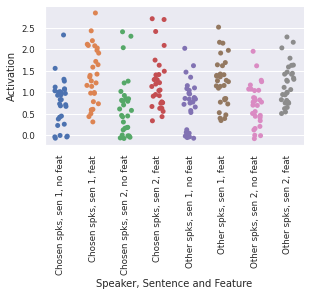

In [ ]:
import seaborn as sns
sns.set(font_scale = 0.8)

g = sns.stripplot('Speaker, Sentence and Feature', 'Activations', data=Jitter, jitter=0.2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.despine()


g.set_xlabel("Speaker, Sentence and Feature", fontsize = 10)
g.set_ylabel("Activation", fontsize = 10)
plt.subplots_adjust(bottom=0.5, top=.98, left=0.2, right=0.8)
plt.savefig('easy.png', dpi=1200)

In [ ]:
# from here is just to check you have imported tts-inference.py correctly
spk = spks[10]
spembs = xvectors[spk]
print(f"selected spk: {spk}")

In [ ]:
import soundfile as sf
import time
# x = "Please call Stella. Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station."
x = "Please call Stella.  Ask her too."
# __call__
wav = text2speech(x, spembs=spembs)["wav"]
# print(text2speech(x, spembs=spembs)["feat_gen"].shape)
# print(text2speech(x, spembs=spembs)["feat_gen_denorm"].shape)

sf.write("out.wav", wav.numpy(), 24000, "PCM_16")

# Display the audio file below
from IPython.display import display, Audio
display(Audio(wav.view(-1).cpu().numpy(), rate=24000))

In [ ]:
index_map(layer, 23970)

In [ ]:
import soundfile as sf
import time
# x = "Please call Stella. Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station."
x = "Please call Stella.  Ask her too."
# __call__
wav = text2speech2(x, spembs=spembs)["wav"]
# print(text2speech(x, spembs=spembs)["feat_gen"].shape)
# print(text2speech(x, spembs=spembs)["feat_gen_denorm"].shape)

sf.write("out.wav", wav.numpy(), 24000, "PCM_16")

# Display the audio file below
from IPython.display import display, Audio
display(Audio(wav.view(-1).cpu().numpy(), rate=24000))

In [ ]:
text2speech.vocoder.remove_edits()

In [ ]:
x = "Please call Stella.  Ask her too."
# __call__
wav = text2speech(x, spembs=spembs)["wav"]
# print(text2speech(x, spembs=spembs)["feat_gen"].shape)
# print(text2speech(x, spembs=spembs)["feat_gen_denorm"].shape)

sf.write("out.wav", wav.numpy(), 24000, "PCM_16")

# Display the audio file below
from IPython.display import display, Audio
display(Audio(wav.view(-1).cpu().numpy(), rate=24000))

In [ ]:
for layer in HiFiGAN_layers:
  temp = text2speech.vocoder.retained_layer(layer).shape
  print(layer, temp[0]*temp[1]*temp[2])

vocoder.upsamples.0.0 51200
vocoder.upsamples.1.0 128000
vocoder.upsamples.2.0 320000
vocoder.upsamples.3.0 640000
vocoder.blocks.0.convs1.0.0 128000
vocoder.blocks.0.convs1.1.0 128000
vocoder.blocks.0.convs1.2.0 128000
vocoder.blocks.0.convs2.0.0 128000
vocoder.blocks.0.convs2.1.0 128000
vocoder.blocks.0.convs2.2.0 128000
vocoder.blocks.1.convs1.0.0 128000
vocoder.blocks.1.convs1.1.0 128000
vocoder.blocks.1.convs1.2.0 128000
vocoder.blocks.1.convs2.0.0 128000
vocoder.blocks.1.convs2.1.0 128000
vocoder.blocks.1.convs2.2.0 128000
vocoder.blocks.2.convs1.0.0 128000
vocoder.blocks.2.convs1.1.0 128000
vocoder.blocks.2.convs1.2.0 128000
vocoder.blocks.2.convs2.0.0 128000
vocoder.blocks.2.convs2.1.0 128000
vocoder.blocks.2.convs2.2.0 128000
vocoder.blocks.3.convs1.0.0 320000
vocoder.blocks.3.convs1.1.0 320000
vocoder.blocks.3.convs1.2.0 320000
vocoder.blocks.3.convs2.0.0 320000
vocoder.blocks.3.convs2.1.0 320000
vocoder.blocks.3.convs2.2.0 320000
vocoder.blocks.4.convs1.0.0 320000
vocoder.bl